In [2]:
import xarray as xr
import numpy as np
import glob

%matplotlib inline

In [16]:
directory = '../testing/'
filenames = [filename.split('/')[-1].split('.')[-2:] for filename in glob.glob(directory + '*.tif')]
arrs = {file: xr.open_rasterio(f'{directory}{file}.{ext}') for file, ext in filenames}
ds = xr.Dataset(arrs)

ds = ds.rename({'band': 'time'})
ds.coords['time'] = [np.datetime64(f'2018-01-{i:02}') for i in range(1,25)]
ds.coords['time']

<xarray.Dataset>
Dimensions:  (time: 24, x: 512, y: 512)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-24
  * y        (y) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * x        (x) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    NDVI     (time, y, x) uint16 ...
    B03      (time, y, x) uint16 ...
    B02      (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    B08      (time, y, x) uint16 ...
    B04      (time, y, x) uint16 ...

<xarray.Dataset>
Dimensions:  (time: 24, x: 512, y: 512)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-24
  * y        (y) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * x        (x) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    NDVI     (time, y, x) uint16 ...
    B03      (time, y, x) uint16 ...
    B02      (time, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    B08      (time, y, x) uint16 ...
    B04      (time, y, x) uint16 ...

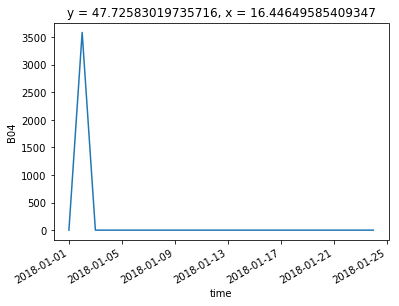

In [18]:
ds.isel(x=0, y=0).B04.plot()
ds